In [1]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%pwd

'C:\\Users\\jerry\\pylot\\visnn'

In [2]:
df = pd.read_csv("C:\\Users\\jerry\\pylot\\visnn\\vis_data\\vis00.csv")
print(df.columns)

Index(['TIME', 'SIMTIME', 'CAMERA', 'GROUNDID', 'LABEL', 'X', 'Y', 'Z',
       'ERROR'],
      dtype='object')


In [3]:
#df = df[df.ERROR < 1000.0] # temporary? ignores all rows with high errors to avoid

inputs = df.iloc[:, -4:-1]
outputs = df.iloc[:, -1]

print(inputs.head)
print(outputs.head)

<bound method NDFrame.head of              X        Y       Z
0      -9.3119   7.7754  0.8779
1     -30.1851 -22.4971  0.8782
2     -33.8570   7.0722  0.5983
3      -9.2389   7.7839  0.9646
4     -30.1744 -22.4304  0.9650
...        ...      ...     ...
10035   3.9087 -17.3394 -0.0451
10036   5.6836 -52.0663  0.9181
10037   3.8360  15.2594 -0.0686
10038   3.9084 -17.8056 -0.0451
10039   5.6111 -52.2866  0.9181

[10040 rows x 3 columns]>
<bound method NDFrame.head of 0              6.3452
1              0.1844
2        1000000.0000
3              0.0642
4        1000000.0000
             ...     
10035          4.5938
10036    1000000.0000
10037    1000000.0000
10038          4.6314
10039    1000000.0000
Name: ERROR, Length: 10040, dtype: float64>


In [9]:
print(inputs.iloc[0, :])

X   -9.3119
Y    7.7754
Z    0.8779
Name: 0, dtype: float64


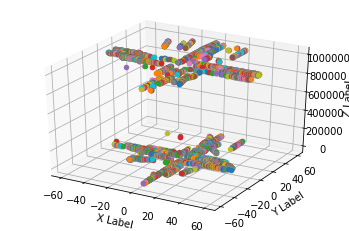

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#n = len(inputs.index)
n = 5000

for i in range(n):
    x = inputs.iloc[i, :].X
    y = inputs.iloc[i, :].Y
    error = outputs[i]
    ax.scatter(x, y, error, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

280


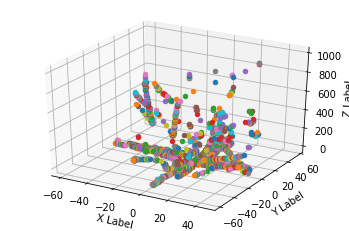

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#n = len(inputs.index)
n = 5000

cnt = 0
for i in range(n):
    x = inputs.iloc[i, :].X
    y = inputs.iloc[i, :].Y
    error = outputs[i]
    if (error > 1000):
        continue
    if (error > 300):
        cnt += 1
    ax.scatter(x, y, error, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

print(cnt)

plt.show()

In [11]:
df

,TIME,SIMTIME,CAMERA,GROUNDID,LABEL,X,Y,Z,ERROR
0,1612812837403,2692,FRONT-eval,333,person,-9.3119,7.7754,0.8779,6.3452
1,1612812837403,2692,FRONT-eval,301,person,-30.1851,-22.4971,0.8782,0.1844
2,1612812837404,2692,FRONT-eval,332,person,-33.8570,7.0722,0.5983,1000000.0000
3,1612812837405,2692,FRONT-eval,333,person,-9.2389,7.7839,0.9646,0.0642
4,1612812837405,2692,FRONT-eval,301,person,-30.1744,-22.4304,0.9650,1000000.0000
...,...,...,...,...,...,...,...,...,...
10035,1612813886086,101442,BACK-eval,286,vehicle,3.9087,-17.3394,-0.0451,4.5938
10036,1612813886086,101442,BACK-eval,357,person,5.6836,-52.0663,0.9181,1000000.0000
10037,1612813886431,101492,FRONT-eval,260,vehicle,3.8360,15.2594,-0.0686,1000000.0000
10038,1612813886588,101492,BACK-eval,286,vehicle,3.9084,-17.8056,-0.0451,4.6314


In [19]:
df = df[df.CAMERA == "FRONT-eval"]
df = df.reset_index(drop=True)
df

,index,TIME,SIMTIME,CAMERA,GROUNDID,LABEL,X,Y,Z,ERROR
0,0,1612812837403,2692,FRONT-eval,333,person,-9.3119,7.7754,0.8779,6.3452
1,1,1612812837403,2692,FRONT-eval,301,person,-30.1851,-22.4971,0.8782,0.1844
2,2,1612812837404,2692,FRONT-eval,332,person,-33.8570,7.0722,0.5983,1000000.0000
3,3,1612812837405,2692,FRONT-eval,333,person,-9.2389,7.7839,0.9646,0.0642
4,4,1612812837405,2692,FRONT-eval,301,person,-30.1744,-22.4304,0.9650,1000000.0000
...,...,...,...,...,...,...,...,...,...,...
4913,10025,1612813884430,101292,FRONT-eval,260,vehicle,3.8304,17.1381,-0.0686,1000000.0000
4914,10030,1612813884972,101342,FRONT-eval,260,vehicle,3.8318,16.6684,-0.0686,1000000.0000
4915,10031,1612813885591,101392,FRONT-eval,260,vehicle,3.8332,16.1988,-0.0686,1.4192
4916,10034,1612813886055,101442,FRONT-eval,260,vehicle,3.8346,15.7291,-0.0686,1000000.0000


In [20]:
inputs = df.iloc[:, -4:-1]
outputs = df.iloc[:, -1]
inputs, outputs

(            X        Y       Z
 0     -9.3119   7.7754  0.8779
 1    -30.1851 -22.4971  0.8782
 2    -33.8570   7.0722  0.5983
 3     -9.2389   7.7839  0.9646
 4    -30.1744 -22.4304  0.9650
 ...       ...      ...     ...
 4913   3.8304  17.1381 -0.0686
 4914   3.8318  16.6684 -0.0686
 4915   3.8332  16.1988 -0.0686
 4916   3.8346  15.7291 -0.0686
 4917   3.8360  15.2594 -0.0686
 
 [4918 rows x 3 columns], 0             6.3452
 1             0.1844
 2       1000000.0000
 3             0.0642
 4       1000000.0000
             ...     
 4913    1000000.0000
 4914    1000000.0000
 4915          1.4192
 4916    1000000.0000
 4917    1000000.0000
 Name: ERROR, Length: 4918, dtype: float64)

212


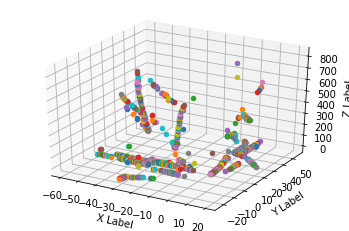

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#n = len(inputs.index)
n = 2000

cnt = 0
for i in range(n):
    x = inputs.iloc[i, :].X
    y = inputs.iloc[i, :].Y
    error = outputs[i]
    if (error > 1000):
        continue
    if (error > 300):
        cnt += 1
    ax.scatter(x, y, error, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

print(cnt)

plt.show()

In [9]:
contdf = pd.read_csv("C:\\Users\\jerry\\pylot\\visnn\\vis_data\\fakecont.csv")

In [13]:
inputs = contdf.iloc[:, -4:-1]
outputs = contdf.iloc[:, -1]

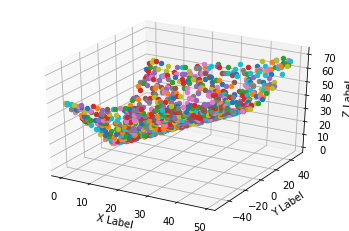

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#n = len(inputs.index)
n = 1000

for i in range(n):
    x = inputs.iloc[i, :].X
    y = inputs.iloc[i, :].Y
    error = outputs[i]
    ax.scatter(x, y, error, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()